# "Creating Data with Generative AI" Assignment 2

- Richa Patel (002728110)
- Karthik Prakash (002728828)
- Sarthak Srivastava (002756847)

### Set Up and Required Dependencies
- Run it in Colab
- Run type - Python 3
- Hardware Accelerator - T4 GPU

In [ ]:
!pip install tensorflow matplotlib
!pip install ganmetrics

In [ ]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input, Embedding, multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras.utils import plot_model

# **What is the generative AI technique being utilized?**

---> In thiProject, a Generative Adversarial Network (GAN) is the generative AI technology being used. Two neural networks—a generator and a discriminator—that are developed concurrently via adversarial training make up a GAN. The discriminator's job is to discern between genuine and created data, whereas the generator's goal is to provide realistic data. As a result of this competitive training process, the generator produces data that is more realistic.
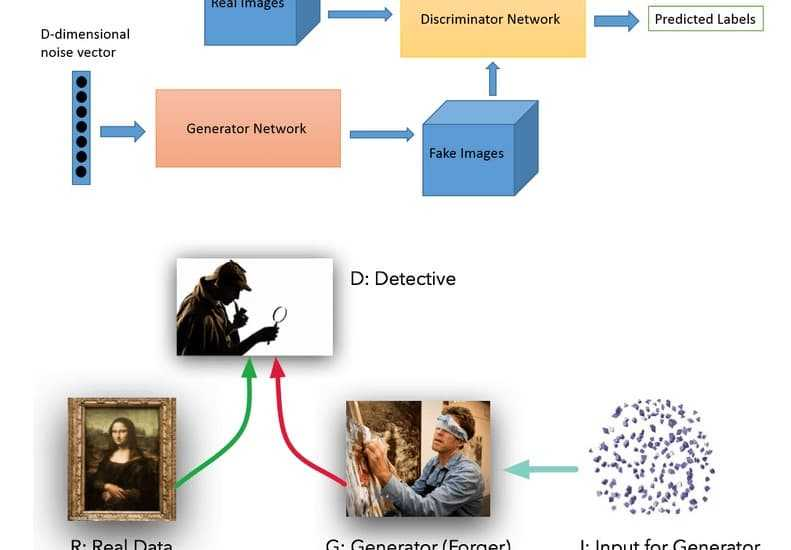



1.   **GAN components include:**

Generator: The generator is a neural network that attempts to produce data that
is similar to the real data it has been trained on by using random noise as its input. When it comes to photos, the generator might, for example, create pictures that resemble actual photographs.

Discriminator: Another neural network that functions as a binary classifier is the discriminator. Its task is to analyze a piece of data and identify if it is fictitious (produced by the generator) or real (from the training dataset). In essence, the discriminator is a "fake data detective."

2.   Adversarial Education:

The primary novelty of GANs is the simultaneous training of the discriminator and generator via a competitive procedure. There are two primary stages to the training:

a. Generator Phase: In this stage, random noise is converted into data that the generator believes would be identical to genuine data, thus producing phony data. The discriminator receives the generated data after that.

b. Discriminator Phase: The generator provides fictitious data and genuine data from the training dataset to the discriminator. It makes an effort to accurately identify which is which. It gives the generator feedback whether it accurately classifies bogus data as fake and true data as real.

3.   **Iterative Learning:**

The generator aspires to become more proficient in creating data that fools the discriminator. It does this by altering its parameters to provide data that becomes increasingly lifelike.

On the other hand, the discriminator wants to get better at identifying real data from fake. It also adjusts its parameters to make it more accurate.

4.   **Balance and Accurate Data Production:**

This adversarial process eventually reaches an equilibrium where the generator produces data that is so realistic that it is no longer able to be distinguished from actual data with any degree of reliability. The generated data is quite persuasive at this time.










# Why is it interesting and relevant in data science?

---> **Data generation:** Generating synthetic data that closely mimics real data is possible with GANs. This is useful for producing data for machine learning model training, enhancing tiny datasets, and building realistic simulations.

**Generating Images and Content:** GANs are extensively employed in the production of fine art, content, and images. They can create original designs for use in graphic design, entertainment, and even fashion.

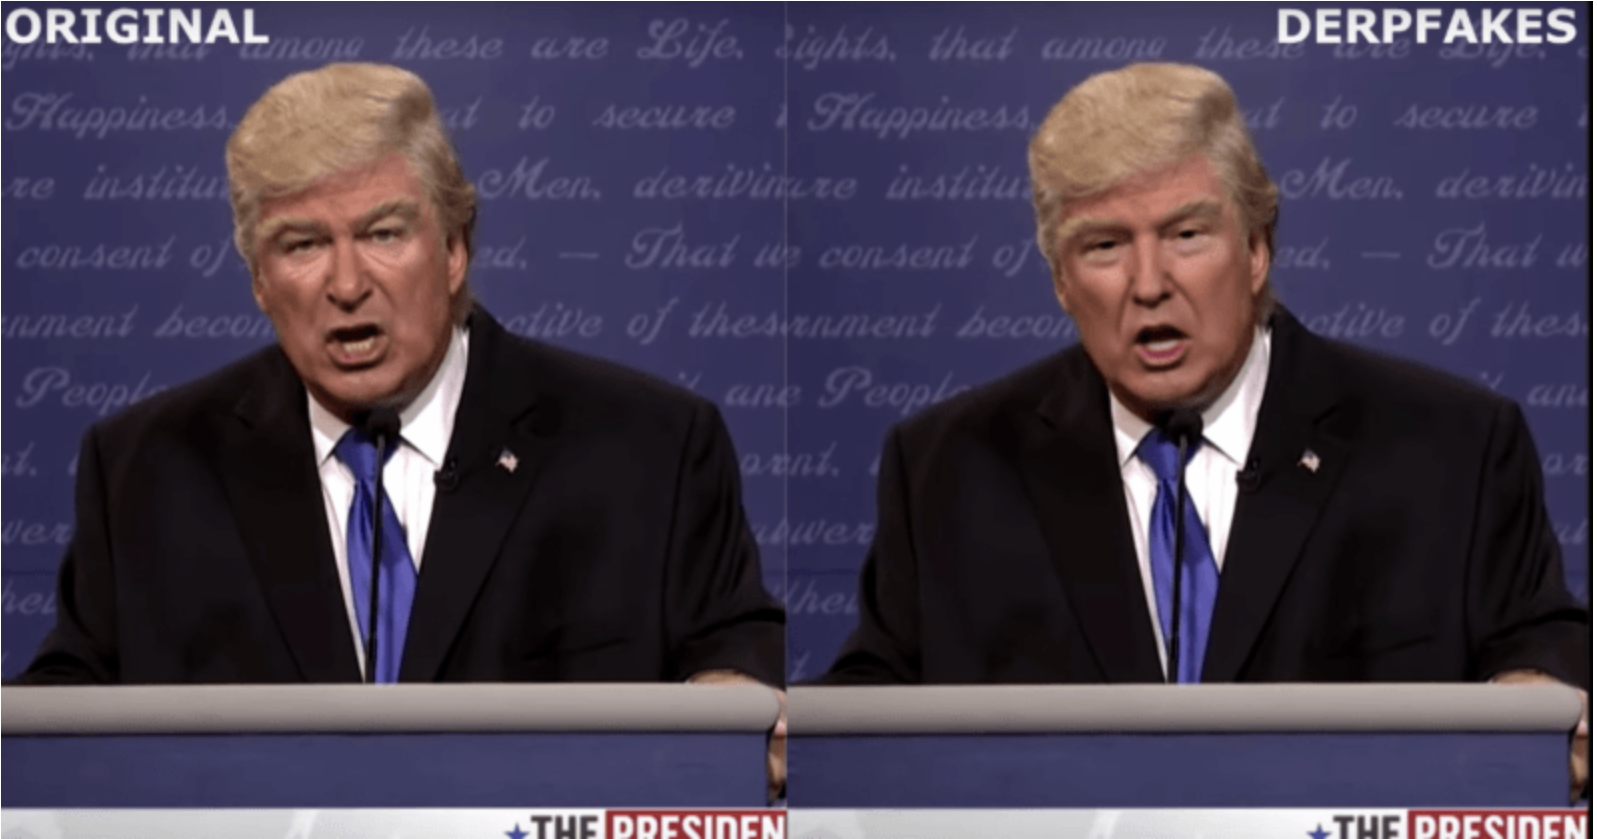

**Detection of anomalies:** GANs can be employed to uncover latent patterns in data. It is possible to identify anomalies that diverge from these patterns, which is essential for cybersecurity, quality assurance, and fraud detection.

**Style transmit:** In both photos and films, GANs are used to transmit style. They can alter an image's aesthetic while maintaining its substance, which is useful in a variety of creative and design Application.

**Data augmentation:** The robustness and generalization of machine learning models can be enhanced by using GANs to produce variations of already-existing data. Particularly in jobs involving computer vision and natural language processing, this is crucial.

**Material Science and Drug development:** GANs can be used to generate molecular structures and predict material properties, which can greatly speed up material science and drug development.

**Healthcare:** While protecting patient privacy, GANs can produce artificial medical images for testing and training diagnostic algorithms. They are also employed in healthcare data analysis for data augmentation and imputation.

**Text and Language Generation:** GANs are useful for jobs involving natural language generation, such as chatbots, language translation, and content creation, since they can produce text that appears human.

**Market research and forecasting:** GANs may produce financial and market data, which helps with scenario analysis and forecasting in the fields of finance and economics.

**Adversarial Training for Robust Models:**To make machine learning models more resilient to adversarial attacks, adversarial training methods have been developed, mostly because to GANs.

# The theoretical foundations behind generative AI

---> Game theory is the foundation of Generative Adversarial Networks (GANs), which are a prime example of how Generative AI operates. In 2014, Ian Goodfellow and associates presented GANs, establishing a training approach typified by a minimax game. The discriminator and generator are in constant struggle in this dynamic. While the discriminator aims to improve its accuracy in distinguishing between actual and produced data, the generator seeks to reduce the likelihood that it would correctly identify generated samples as fraudulent. Reaching Nash equilibrium denotes a situation in which the generator generates data that is almost identical to real data.

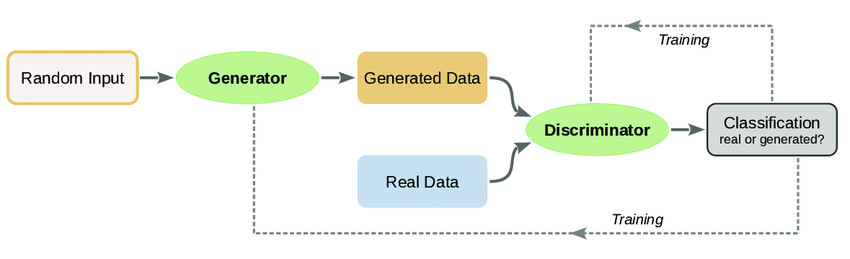



# Code examples demonstrating data generation:

Below Code are exemplifies the implementation of a GAN using TensorFlow and Keras. The generator and discriminator are constructed using neural networks, and the GAN is trained to generate synthetic images resembling handwritten digits from the MNIST dataset.

---> Both training and testing data are loaded using the load_data function in Keras, which pulls data from the MNIST dataset. However, the matching labels (_) are not used in this sample; instead, only the training data (x_train) is used.

- fig, axes - Its generates a figure with one row (1) and five columns (5) of subplots. The figure's overall dimensions are configured to be three units high and fifteen units wide.

- for loop iterates over the first 15 images in the training dataset (x_train) and displays each image on a separate subplot

- .imshow is used to display the image in grayscale (cmap='gray')

- .axis('off') is used to hide the axis labels for better visualization.


11490434/11490434 [==============================] - 0s 0us/step


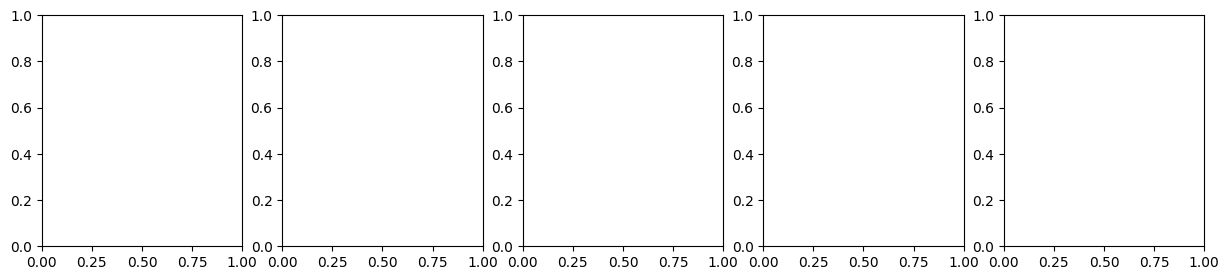

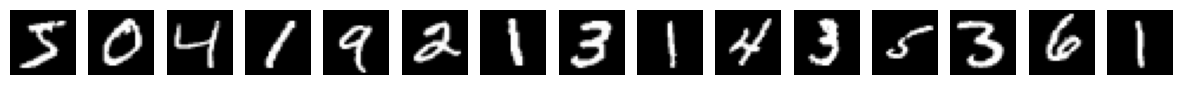

In [ ]:
# Load and Pre-process (MNIST dataset)
(x_train, _), (_, _) = mnist.load_data()
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
fig, axes = plt.subplots(1, 15, figsize=(15, 3))
for i in range(15):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')

plt.show()

---> The x_train dataset's pixel values are all normalized here.

- The pixel values are scaled to the range [-1, 1] by dividing by 127.5, and they are further shifted to come within the intended range by subtracting 1.0.

- For models that employ tanh activation functions, this type of normalization is frequently applied to picture data since it facilitates the model's more efficient convergence.

- An additional dimension is added to the photos using the np.expand_dims function. When dealing with convolutional neural networks (CNNs), which require input data to have a shape that includes a channel dimension, this is frequently required.

- The data's shape is changed from (original_shape) to (original_shape[0], original_shape[1], and original_shape[2], in this instance because axis=3 specifies that the additional dimension should be inserted as the fourth dimension.For grayscale photos, this is typically necessary when using deep learning models.


In [ ]:
x_train = x_train / 127.5 - 1.0
x_train = np.expand_dims(x_train, axis=3)
print(x_train.shape)


(60000, 28, 28, 1)


### ---> Overview of our Architecture:

- In Keras, the generator is built using a sequential model that denotes a linear stack of layers.
Dense Layers with Batch Normalization and Leaky ReLU:

- The generator is composed of three densely connected layers, with Batch Normalization and Leaky ReLU activation coming after each layer. The vanishing gradient issue is lessened by Leaky ReLU, and training is stabilized and accelerated by Batch Normalization.
Resulting Layer:

- Using the tanh activation function, the output layer generates values between -1 and 1. This is typical of GANs used to produce images.
Modify Layer:

- The output shape is modified by a Reshape layer to (28, 28, 1), which represents a grayscale image's dimensions.
Model of Return:

- The generated generator model is returned by the function.
Basically, the generator's purpose is to convert random noise (input with 100 dimensions) into artificial visuals that mimic handwritten numbers. Tanh activation in the output layer makes sure the generated images fall within the intended range, and the architecture uses methods like Batch Normalization and Leaky ReLU to improve training stability.

In [ ]:
# Defining Generator model
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

---> Here we used a pre-trained generator within a Generative Adversarial Network (GAN) to generate a synthetic image.

**Launch the Generator:**
The previously defined generator model is created as an instance.
Put the Generator together:

**Compile the Generator:**
Certain parameters are applied when compiling the generator model, such as selecting the Adam optimizer and a binary cross-entropy loss function. The model must be compiled before it can be used.

**Make Stochastic Noise:**
The result is a vector of random noise with size (1, 100). This vector, which represents the latent space from which the generator will produce an image, is used as the generator's input.
Create an Output Picture:

**Generate an Output Image:**
The generator creates a synthetic image by applying the predict method to process the random noise input.

**Present the Resultant Image:**
The generated image is visualized using Matplotlib. Grayscale is used to display the image, and the axis labels are

1/1 [==============================] - 3s 3s/step


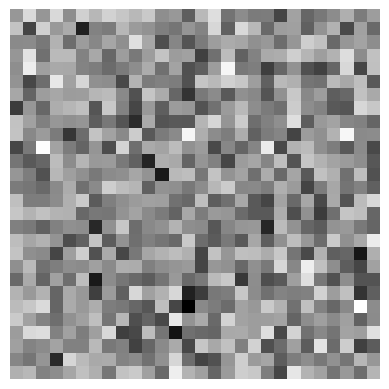

In [ ]:
generator = build_generator()

# Compile the model
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Generate random noise as input
random_input = np.random.normal(0, 1, size=(1, 100))

# Generate an output image
generated_image = generator.predict(random_input)

# Display the generated image
import matplotlib.pyplot as plt

plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

---> Architecture for a discriminator model within a Generative Adversarial Network (GAN)

- In Keras, a sequential model is used to construct the discriminator.
Level Layer:

- The input is flattened using a Flatten layer; a 28x28 grayscale image is anticipated.
Compact Layers with Permeable ReLU:

- The model is expanded with three dense (fully connected) layers, each of which has Leaky ReLU activation after it. For negative values, Leaky ReLU permits a small gradient and aids in preventing the vanishing gradient issue.
Layer of Output:

- There is just one neuron with a sigmoid activation function in the output layer. An output between 0 and 1, which indicates the probability that the input image is generated (or real) (1), is produced by the sigmoid activation.
Return Type:

- The built discriminator model is returned by the function.

In [ ]:
# Defining the Discriminator model
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model


---> In the below code discriminator model's operation in a Generative Adversarial Network (GAN). This is a synopsis of the breakdown:

**Instantiate the Discriminator:**

- A new instance of the discriminator model that was previously defined is made.
Put the Discriminator together:

- The binary cross-entropy loss function, the Adam optimizer, and accuracy as a metric are among the particular configurations used in the compilation of the discriminator model. In doing so, the discriminator is ready to assess and categorize images.
Create a Realistic (Simulated) Image:

- It generates a simulated real image. This step would normally involve loading a real image from a dataset in practice.
Estimate the Discriminator's Results:

- Using the predict method, the discriminator processes the input, which is a simulated real or generated image, and outputs an evaluation of the input that reflects the discriminator's assessment.

- The output of the discriminator is printed out, showing how likely or confident it is that the input image is authentic. A value nearer 1 indicates a high degree of authenticity confidence in the image.



In [ ]:
discriminator = build_discriminator()

# Compile the model
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Load a real image (you can use an image from the MNIST dataset or any other source)
real_image = np.random.normal(0, 1, size=(1, 28, 28, 1))

# Predict the output of the discriminator for the real image
discriminator_output = discriminator.predict(real_image)

# Display the discriminator's output
print("Discriminator Output:", discriminator_output[0, 0])


1/1 [==============================] - 0s 150ms/step
Discriminator Output: 0.6231991


---> Establisging GAN while combining a pre-trained generator and a discriminator.

- **Freeze Discriminator Weights**:
The weights of the discriminator are frozen, indicating that during training, only the generator's weights will be updated.

- **Instantiate Generator**:
An instance of the generator model is created, which is responsible for transforming random noise into synthetic images.

- **Define Input for Generator**:
An input placeholder (z) is defined to represent the random noise vector that serves as input to the generator.

- **Generate Images with Generator**:
The generator processes the random noise vector (z) to generate synthetic images (img).

- **Pass Generated Images to Discriminator:**
The generated images are passed to the discriminator, and the output (validity) represents the discriminator's assessment of whether the images are real or generated.

- **Build GAN Model**:
The GAN model is constructed by defining a model with the generator's input (z) and the discriminator's output (validity). This combined model is designed to train the generator to produce images that can convincingly fool the discriminator.

- **Compile GAN Model**:
The GAN model is compiled with binary cross-entropy loss, and the Adam optimizer is used. This prepares the GAN for joint training, where the generator learns to generate realistic images by trying to deceive the discriminator.


In [ ]:
# Build the GAN model
discriminator.trainable = False
generator = build_generator()
z = Input(shape=(100,))
img = generator(z)
validity = discriminator(img)
gan = Model(z, validity)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

---> In below code When you print the summary of the generator model, it displays a table with information about each layer, including the type of layer, output shape, and the number of parameters.

In [ ]:
print("Generator Summary:")
generator.summary()


Generator Summary:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               25856     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization_4 (Bat  (None, 512)               2048      
 chNormalization)                  

---> In the below code When you print the summary of the discriminator model, it displays a table with information about each layer, including the layer type, output shape, and the number of parameters.

In [ ]:
print("\nDiscriminator Summary:")
discriminator.summary()


Discriminator Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (

---> In the Below Code When you print the summary of the GAN (Generative Adversarial Network) model, which combines the generator and discriminator, it displays information about each layer in the model.

In [ ]:
print("\nGAN Summary:")
gan.summary()


GAN Summary:
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_2 (Sequential)   (None, 28, 28, 1)         1493520   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 2953745 (11.27 MB)
Trainable params: 1489936 (5.68 MB)
Non-trainable params: 1463809 (5.58 MB)
_________________________________________________________________


---> The below code defines a function train_gan for training a Generative Adversarial Network (GAN).

- **Loop of Training:**
The function traverses the dataset iteratively over a predetermined number of epochs, each of which represents a full pass.

- **Group Creation:**
A random selection of actual images (imgs) from the training dataset is made for each epoch. In addition, random noise vectors, or noise, are produced in order to supply the generator with input.

- **Training for Discriminators (Actual and Fake)**
Two batches of real images (imgs) with target labels indicating they are real and generated images (gen_imgs) with target labels indicating they are fake are used to train the discriminator. The average of the losses on the real and fake batches is used to compute the discriminator's loss.

- **Generator Training**
The generator is trained by providing random noise vectors as input and assigning target labels indicating the generated images are real. This aims to improve the generator's ability to produce realistic images that can potentially deceive the discriminator.

- **Loss Calculation:**
The function calculates and prints the discriminator and generator losses at each epoch. The discriminator loss is the average of the losses on real and fake batches, while the generator loss is based on the GAN's training on generated images.

- **Progress Tracking and Image Generation**:
The training progress is printed, including the discriminator loss and accuracy, as well as the generator loss. Additionally, at specified intervals, the function calls save_generated_images to save and display generated images, providing a visual representation of the generator's progress.


In [ ]:
# Function to train the GAN
def train_gan(epochs=1, batch_size=128, save_interval=50):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        imgs = x_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))

        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, 100))

        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print progress and save generated images at specified intervals
        if epoch % save_interval == 0:
            print(f"Epoch {epoch}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]:.2f}] [G loss: {g_loss:.2f}]")
            save_generated_images(epoch)
        else:
            print(f"Epoch {epoch}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]:.2f}] [G loss: {g_loss:.2f}]")


---> A function save_generated_images to generate, visualize, and save synthetic images created by the generator during the training of a Generative Adversarial Network (GAN).

- **Generate Synthetic Images**:
The function takes as input random noise vectors and outputs a predetermined number of synthetic images (examples).
Modify the image scaling.

- **Adjust Image Scaling**:
The generated images are multiplied by 0.5 and added by 0.5 to rescale them to fall within the interval [0, 1]. Pixel values are guaranteed to fall within a valid image range by this normalization.

- **Illustration**:
The function visualizes and displays the generated images by building a grid of subplots. The parameters that can be customized are the figure size (figsize) and grid dimensions (dim).

- **Save Images**:
The generated image grid is saved as a PNG file named based on the training epoch. This allows tracking the evolution of generated images over training epochs.

- **Display Images**:
The function displays the generated image grid using Matplotlib's imshow function.

- **Integration with Training Loop**:
The function is called within the training loop of the GAN (train_gan), typically at specified intervals (save_interval), providing a visual representation of the generator's progress over epochs.


1/1 [==============================] - 0s 169ms/step
Epoch 0/10000 [D loss: 0.7735937237739563 | D accuracy: 40.62] [G loss: 0.23]
1/1 [==============================] - 0s 117ms/step


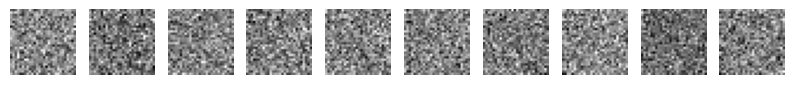

1/1 [==============================] - 0s 23ms/step
Epoch 1/10000 [D loss: 0.2721915257860845 | D accuracy: 96.88] [G loss: 0.42]
1/1 [==============================] - 0s 15ms/step
Epoch 2/10000 [D loss: 0.18388804793395505 | D accuracy: 98.44] [G loss: 1.27]
1/1 [==============================] - 0s 16ms/step
Epoch 3/10000 [D loss: 0.13713935017585868 | D accuracy: 96.88] [G loss: 3.10]
1/1 [==============================] - 0s 16ms/step
Epoch 4/10000 [D loss: 0.06472366303218507 | D accuracy: 98.44] [G loss: 6.07]
1/1 [==============================] - 0s 24ms/step
Epoch 5/10000 [D loss: 0.014667729027086462 | D accuracy: 100.00] [G loss: 9.71]
1/1 [==============================] - 0s 23ms/step
Epoch 6/10000 [D loss: 0.003461105632595718 | D accuracy: 100.00] [G loss: 12.77]
1/1 [==============================] - 0s 19ms/step
Epoch 7/10000 [D loss: 0.34697232709731907 | D accuracy: 84.38] [G loss: 11.90]
1/1 [==============================] - 0s 17ms/step
Epoch 8/10000 [D loss: 0.0

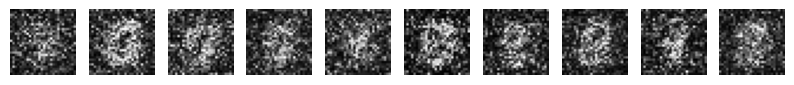

1/1 [==============================] - 0s 21ms/step
Epoch 1001/10000 [D loss: 0.32323473831638694 | D accuracy: 81.25] [G loss: 2.32]
1/1 [==============================] - 0s 15ms/step
Epoch 1002/10000 [D loss: 0.07554513216018677 | D accuracy: 100.00] [G loss: 5.42]
1/1 [==============================] - 0s 15ms/step
Epoch 1003/10000 [D loss: 0.6201970614492893 | D accuracy: 71.88] [G loss: 1.65]
1/1 [==============================] - 0s 15ms/step
Epoch 1004/10000 [D loss: 0.28182971477508545 | D accuracy: 85.94] [G loss: 1.11]
1/1 [==============================] - 0s 16ms/step
Epoch 1005/10000 [D loss: 0.34154744911938906 | D accuracy: 78.12] [G loss: 1.77]
1/1 [==============================] - 0s 20ms/step
Epoch 1006/10000 [D loss: 0.08986463956534863 | D accuracy: 100.00] [G loss: 4.15]
1/1 [==============================] - 0s 18ms/step
Epoch 1007/10000 [D loss: 0.30775026604533195 | D accuracy: 87.50] [G loss: 3.29]
1/1 [==============================] - 0s 21ms/step
Epoch 100

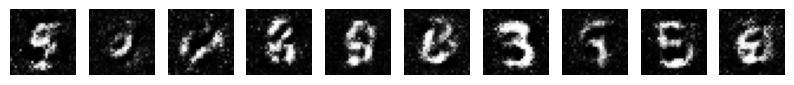

1/1 [==============================] - 0s 34ms/step
Epoch 2001/10000 [D loss: 0.19846875965595245 | D accuracy: 93.75] [G loss: 3.03]
1/1 [==============================] - 0s 20ms/step
Epoch 2002/10000 [D loss: 0.24099068716168404 | D accuracy: 87.50] [G loss: 3.10]
1/1 [==============================] - 0s 23ms/step
Epoch 2003/10000 [D loss: 0.6053104102611542 | D accuracy: 68.75] [G loss: 1.75]
1/1 [==============================] - 0s 22ms/step
Epoch 2004/10000 [D loss: 0.3126172050833702 | D accuracy: 84.38] [G loss: 2.81]
1/1 [==============================] - 0s 32ms/step
Epoch 2005/10000 [D loss: 0.2017166092991829 | D accuracy: 90.62] [G loss: 3.56]
1/1 [==============================] - 0s 23ms/step
Epoch 2006/10000 [D loss: 0.4168384075164795 | D accuracy: 78.12] [G loss: 2.32]
1/1 [==============================] - 0s 25ms/step
Epoch 2007/10000 [D loss: 0.4762709438800812 | D accuracy: 75.00] [G loss: 1.51]
1/1 [==============================] - 0s 23ms/step
Epoch 2008/1000

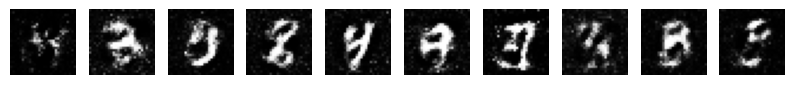

1/1 [==============================] - 0s 28ms/step
Epoch 3001/10000 [D loss: 0.2291644960641861 | D accuracy: 87.50] [G loss: 3.17]
1/1 [==============================] - 0s 16ms/step
Epoch 3002/10000 [D loss: 0.33603493869304657 | D accuracy: 85.94] [G loss: 2.46]
1/1 [==============================] - 0s 15ms/step
Epoch 3003/10000 [D loss: 0.5027632564306259 | D accuracy: 78.12] [G loss: 2.56]
1/1 [==============================] - 0s 15ms/step
Epoch 3004/10000 [D loss: 0.42048870027065277 | D accuracy: 75.00] [G loss: 1.99]
1/1 [==============================] - 0s 21ms/step
Epoch 3005/10000 [D loss: 0.4043723940849304 | D accuracy: 81.25] [G loss: 1.68]
1/1 [==============================] - 0s 16ms/step
Epoch 3006/10000 [D loss: 0.47393612563610077 | D accuracy: 79.69] [G loss: 1.69]
1/1 [==============================] - 0s 17ms/step
Epoch 3007/10000 [D loss: 0.32956624031066895 | D accuracy: 82.81] [G loss: 2.63]
1/1 [==============================] - 0s 16ms/step
Epoch 3008/10

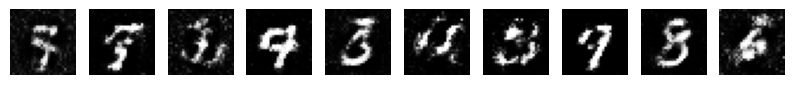

1/1 [==============================] - 0s 28ms/step
Epoch 4001/10000 [D loss: 0.45387300848960876 | D accuracy: 71.88] [G loss: 1.99]
1/1 [==============================] - 0s 15ms/step
Epoch 4002/10000 [D loss: 0.47949422895908356 | D accuracy: 76.56] [G loss: 1.82]
1/1 [==============================] - 0s 16ms/step
Epoch 4003/10000 [D loss: 0.5176299512386322 | D accuracy: 75.00] [G loss: 1.54]
1/1 [==============================] - 0s 20ms/step
Epoch 4004/10000 [D loss: 0.38093557953834534 | D accuracy: 81.25] [G loss: 1.49]
1/1 [==============================] - 0s 15ms/step
Epoch 4005/10000 [D loss: 0.44667357206344604 | D accuracy: 78.12] [G loss: 1.48]
1/1 [==============================] - 0s 18ms/step
Epoch 4006/10000 [D loss: 0.36963051557540894 | D accuracy: 82.81] [G loss: 1.58]
1/1 [==============================] - 0s 19ms/step
Epoch 4007/10000 [D loss: 0.3971831351518631 | D accuracy: 78.12] [G loss: 1.78]
1/1 [==============================] - 0s 14ms/step
Epoch 4008/1

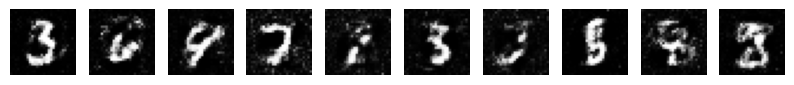

1/1 [==============================] - 0s 26ms/step
Epoch 5001/10000 [D loss: 0.49515825510025024 | D accuracy: 76.56] [G loss: 1.94]
1/1 [==============================] - 0s 14ms/step
Epoch 5002/10000 [D loss: 0.37940713763237 | D accuracy: 82.81] [G loss: 1.71]
1/1 [==============================] - 0s 17ms/step
Epoch 5003/10000 [D loss: 0.41583557426929474 | D accuracy: 81.25] [G loss: 1.55]
1/1 [==============================] - 0s 20ms/step
Epoch 5004/10000 [D loss: 0.45119260251522064 | D accuracy: 79.69] [G loss: 1.46]
1/1 [==============================] - 0s 16ms/step
Epoch 5005/10000 [D loss: 0.49513280391693115 | D accuracy: 76.56] [G loss: 1.41]
1/1 [==============================] - 0s 39ms/step
Epoch 5006/10000 [D loss: 0.39818015694618225 | D accuracy: 81.25] [G loss: 1.69]
1/1 [==============================] - 0s 37ms/step
Epoch 5007/10000 [D loss: 0.5166890919208527 | D accuracy: 75.00] [G loss: 1.61]
1/1 [==============================] - 0s 38ms/step
Epoch 5008/100

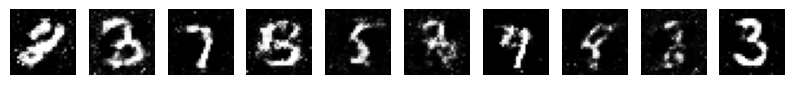

1/1 [==============================] - 0s 18ms/step
Epoch 6001/10000 [D loss: 0.4589540362358093 | D accuracy: 79.69] [G loss: 1.27]
1/1 [==============================] - 0s 15ms/step
Epoch 6002/10000 [D loss: 0.5657758712768555 | D accuracy: 68.75] [G loss: 1.38]
1/1 [==============================] - 0s 21ms/step
Epoch 6003/10000 [D loss: 0.3546692579984665 | D accuracy: 82.81] [G loss: 1.42]
1/1 [==============================] - 0s 16ms/step
Epoch 6004/10000 [D loss: 0.4895908236503601 | D accuracy: 76.56] [G loss: 1.30]
1/1 [==============================] - 0s 14ms/step
Epoch 6005/10000 [D loss: 0.4899129122495651 | D accuracy: 76.56] [G loss: 1.27]
1/1 [==============================] - 0s 17ms/step
Epoch 6006/10000 [D loss: 0.5159168541431427 | D accuracy: 71.88] [G loss: 1.11]
1/1 [==============================] - 0s 15ms/step
Epoch 6007/10000 [D loss: 0.38473692536354065 | D accuracy: 85.94] [G loss: 1.36]
1/1 [==============================] - 0s 15ms/step
Epoch 6008/10000

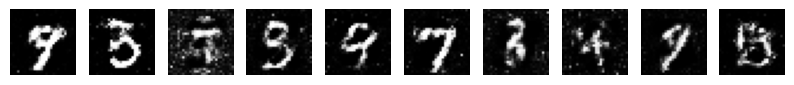

1/1 [==============================] - 0s 23ms/step
Epoch 7001/10000 [D loss: 0.49507276713848114 | D accuracy: 76.56] [G loss: 1.25]
1/1 [==============================] - 0s 15ms/step
Epoch 7002/10000 [D loss: 0.6343992054462433 | D accuracy: 59.38] [G loss: 1.39]
1/1 [==============================] - 0s 21ms/step
Epoch 7003/10000 [D loss: 0.46926049888134 | D accuracy: 73.44] [G loss: 1.49]
1/1 [==============================] - 0s 18ms/step
Epoch 7004/10000 [D loss: 0.5753480195999146 | D accuracy: 70.31] [G loss: 1.36]
1/1 [==============================] - 0s 16ms/step
Epoch 7005/10000 [D loss: 0.5898064076900482 | D accuracy: 64.06] [G loss: 1.26]
1/1 [==============================] - 0s 14ms/step
Epoch 7006/10000 [D loss: 0.41371575742959976 | D accuracy: 75.00] [G loss: 1.33]
1/1 [==============================] - 0s 15ms/step
Epoch 7007/10000 [D loss: 0.5094460248947144 | D accuracy: 75.00] [G loss: 1.59]
1/1 [==============================] - 0s 23ms/step
Epoch 7008/10000 

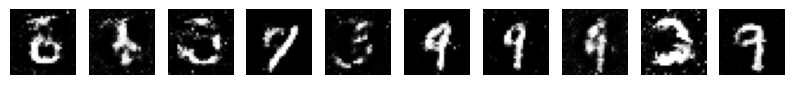

1/1 [==============================] - 0s 22ms/step
Epoch 8001/10000 [D loss: 0.6276418566703796 | D accuracy: 64.06] [G loss: 1.21]
1/1 [==============================] - 0s 15ms/step
Epoch 8002/10000 [D loss: 0.5579273104667664 | D accuracy: 73.44] [G loss: 1.32]
1/1 [==============================] - 0s 15ms/step
Epoch 8003/10000 [D loss: 0.506538063287735 | D accuracy: 76.56] [G loss: 1.46]
1/1 [==============================] - 0s 22ms/step
Epoch 8004/10000 [D loss: 0.5695998668670654 | D accuracy: 70.31] [G loss: 1.30]
1/1 [==============================] - 0s 15ms/step
Epoch 8005/10000 [D loss: 0.4354187995195389 | D accuracy: 84.38] [G loss: 1.37]
1/1 [==============================] - 0s 15ms/step
Epoch 8006/10000 [D loss: 0.5470201373100281 | D accuracy: 67.19] [G loss: 1.33]
1/1 [==============================] - 0s 24ms/step
Epoch 8007/10000 [D loss: 0.5170831978321075 | D accuracy: 71.88] [G loss: 1.20]
1/1 [==============================] - 0s 19ms/step
Epoch 8008/10000 [

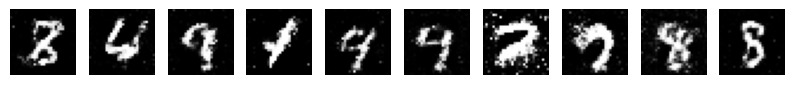

1/1 [==============================] - 0s 25ms/step
Epoch 9001/10000 [D loss: 0.5213962197303772 | D accuracy: 75.00] [G loss: 1.00]
1/1 [==============================] - 0s 23ms/step
Epoch 9002/10000 [D loss: 0.5813423991203308 | D accuracy: 65.62] [G loss: 1.06]
1/1 [==============================] - 0s 23ms/step
Epoch 9003/10000 [D loss: 0.5389741659164429 | D accuracy: 73.44] [G loss: 1.09]
1/1 [==============================] - 0s 29ms/step
Epoch 9004/10000 [D loss: 0.6315878331661224 | D accuracy: 67.19] [G loss: 1.04]
1/1 [==============================] - 0s 31ms/step
Epoch 9005/10000 [D loss: 0.5416837334632874 | D accuracy: 65.62] [G loss: 1.23]
1/1 [==============================] - 0s 22ms/step
Epoch 9006/10000 [D loss: 0.6738575398921967 | D accuracy: 62.50] [G loss: 1.19]
1/1 [==============================] - 0s 24ms/step
Epoch 9007/10000 [D loss: 0.5200717449188232 | D accuracy: 73.44] [G loss: 1.28]
1/1 [==============================] - 0s 28ms/step
Epoch 9008/10000 

In [ ]:
# Function to save generated images
def save_generated_images(epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = generated_images * 0.5 + 0.5

    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize, sharex=True, sharey=True)
    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            axs[j].imshow(generated_images[cnt, :, :, 0], cmap='gray')
            axs[j].axis('off')
            cnt += 1
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.show()

train_gan(epochs=10000, batch_size=64, save_interval=1000)

---> Code defines a function, save_generated_images, which is responsible for generating, visualizing, and saving synthetic images produced by a Generative Adversarial Network (GAN).

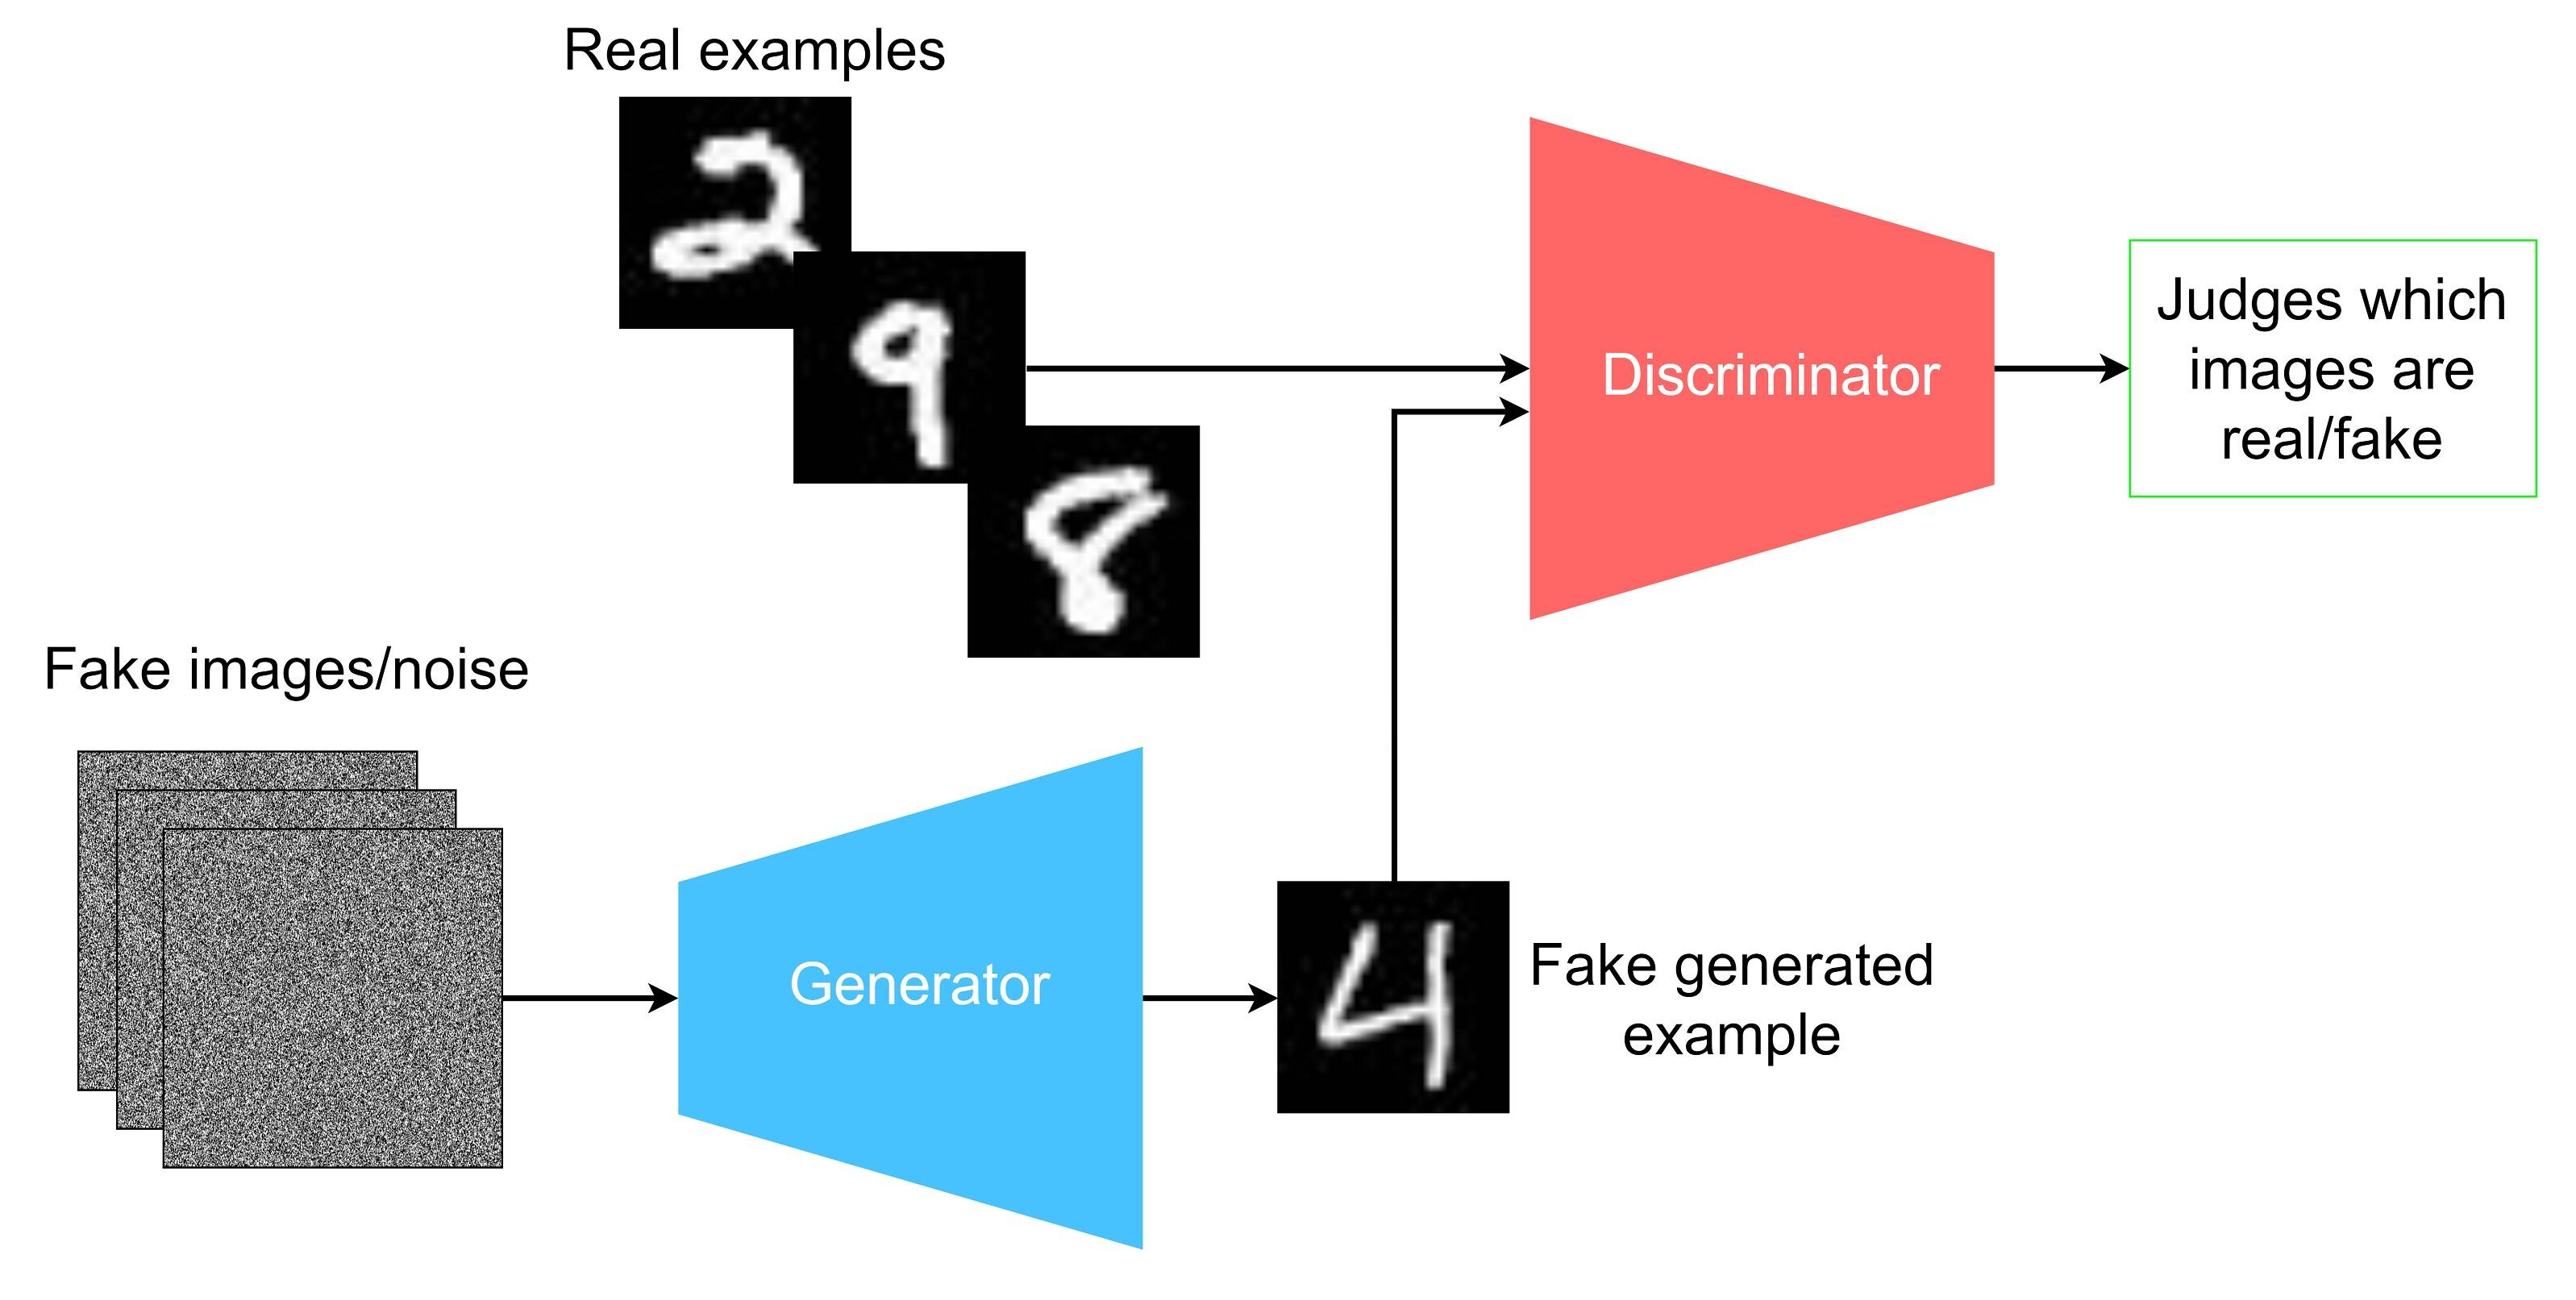

---> Alternative Generator Architecture:

###Principal Difference

- **Quantity of Neurones**:
The alternative architecture (128, 256) lacks the denser layers and more neurons (256, 512, 1024) of the original architecture.

- **Normalization in Batch**:
After every dense layer in the original architecture, there are Batch Normalization layers that offer normalization advantages during training. Batch Normalization is not a feature of the alternate architecture.

- **Model Intricacy**:
The original architecture has more layers and parameters, making it more complicated. Although there is a chance of overfitting, it might be better at identifying complex patterns in the data.

- **Function of Activation**:
Leaky ReLU is the activation function used in both architectures, however hyperbolic tangent (tanh) activation is also included in the output layer of the original architecture.

- **Quantity in Batch**:
The size and makeup of the dataset as well as the level of complexity that is required for the generated images may have an impact on the architecture selection.

#### The original architecture is more elaborate with additional layers and Batch Normalization, potentially offering a higher capacity for learning complex patterns. The alternative architecture is simpler and may be suitable for tasks where a less complex generator is sufficient. The choice between architectures depends on the specific requirements and characteristics of the GAN application.

In [ ]:
# Alternative Generator Architecture
def build_generator_alternative():
    model = Sequential()
    model.add(Dense(128, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model


1/1 [==============================] - 0s 56ms/step


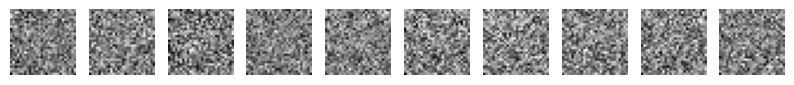

In [ ]:
def generate_and_save_images(generator, epoch, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = generated_images * 0.5 + 0.5  # Rescale pixel values to [0, 1]

    fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize, sharex=True, sharey=True)
    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            axs[j].imshow(generated_images[cnt, :, :, 0], cmap='gray')
            axs[j].axis('off')
            cnt += 1
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.show()

# Generate and save images using the alternative generator
generate_and_save_images(generator=build_generator_alternative(), epoch=0)


1/1 [==============================] - 0s 257ms/step


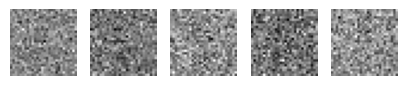

In [ ]:
# Conditional GAN
num_classes = 10

# Function to build the conditional generator
def build_conditional_generator():
    noise = Input(shape=(100,))
    label = Input(shape=(1,), dtype='int32')
    label_embedding = Flatten()(Embedding(num_classes, 100)(label))
    model_input = multiply([noise, label_embedding])

    model = Sequential()
    model.add(Dense(128, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))

    img = model(model_input)
    return Model([noise, label], img)

# Create an instance of the conditional generator
conditional_generator = build_conditional_generator()

# Generate and visualize images for a specific class (e.g., class 3)
def generate_and_visualize_images(generator, class_label, examples=5):
    noise = np.random.normal(0, 1, (examples, 100))
    labels = np.full((examples, 1), class_label)

    generated_images = generator.predict([noise, labels])
    generated_images = generated_images * 0.5 + 0.5

    fig, axs = plt.subplots(1, examples, figsize=(examples, 1))
    for i in range(examples):
        axs[i].imshow(generated_images[i, :, :, 0], cmap='gray')
        axs[i].axis('off')
    plt.show()

# Generate and visualize images for class 3
generate_and_visualize_images(conditional_generator, class_label=3, examples=5)

#### Wasserstein Generative Adversarial Network (WGAN)

- The objective of this loss function is to minimize the difference between the discriminator's predictions (y_pred) and the true labels (y_true), which are multiplied element-wise and then averaged.

- In the below code the generator includes dense layers with Leaky ReLU activation and batch normalization. It takes random noise as input and generates synthetic images.

- The discriminator is composed of dense layers with Leaky ReLU activation. It takes images as input and outputs a single value indicating the validity of the input as a real image.

- The discriminator for the WGAN is built and compiled using the Wasserstein loss and RMSprop optimize.

- The Wasserstein loss is used as the loss function for the discriminator, and RMSprop is chosen as the optimizer.

- Build the Combined Model for WGAN (Generator + Discriminator):
The combined model is created by linking the generator to the discriminator while keeping the discriminator temporarily untrainable.

- The combined model is used to train the generator to minimize the Wasserstein loss. During this training phase, the discriminator is set to be untrainable to avoid conflicting gradients.



In [ ]:
# Define the Wasserstein loss function
def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)



# Define the generator model
def build_generator_wgan():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Define the discriminator model
def build_discriminator_wgan():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1))
    return model

# Build and compile the discriminator for WGAN
discriminator_wgan = build_discriminator_wgan()
discriminator_wgan.compile(loss=wasserstein_loss, optimizer=RMSprop(lr=0.00005))

generator_wgan = build_generator_wgan()

# The generator takes noise as input and generates images
z = Input(shape=(100,))
img = generator_wgan(z)

discriminator_wgan.trainable = False

# The discriminator takes generated images as input and determines validity
validity = discriminator_wgan(img)

# Trains the generator to fool the discriminator
combined_wgan = Model(z, validity)
combined_wgan.compile(loss=wasserstein_loss, optimizer=RMSprop(lr=0.00005))


---> The below Code demonstrates the implementation of a Wasserstein Generative Adversarial Network (WGAN) using TensorFlow for generating images. It includes the definition of the generator and discriminator models, the Wasserstein loss function, and the training loop that updates both the generator and discriminator in an adversarial manner. The use of Wasserstein loss and weight clipping helps stabilize the training of the GAN

In [ ]:

# Load and preprocess the MNIST dataset
(train_images, _), (_, _) = mnist.load_data()
train_images = train_images / 127.5 - 1.0  # Normalize to the range [-1, 1]
train_images = np.expand_dims(train_images, axis=-1)

# Define the Wasserstein loss function
def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)

# Define the generator model
def build_generator_wgan():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Define the discriminator model
def build_discriminator_wgan():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1))
    return model

# Build and compile the discriminator for WGAN
discriminator_wgan = build_discriminator_wgan()
discriminator_wgan.compile(loss=wasserstein_loss, optimizer=RMSprop(lr=0.00005))

generator_wgan = build_generator_wgan()

# The generator takes noise as input and generates images
z = Input(shape=(100,))
img = generator_wgan(z)

# For the combined model, only train the generator
discriminator_wgan.trainable = False

# The discriminator takes generated images as input and determines validity
validity = discriminator_wgan(img)

# Trains the generator to fool the discriminator
combined_wgan = Model(z, validity)
combined_wgan.compile(loss=wasserstein_loss, optimizer=RMSprop(lr=0.00005))

# Training loop (modify this based on your dataset)
epochs = 10000
batch_size = 64

for epoch in range(epochs):
    idx = np.random.randint(0, train_images.shape[0], batch_size)
    real_imgs = train_images[idx]

    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator_wgan.predict(noise)

    d_loss_real = discriminator_wgan.train_on_batch(real_imgs, -np.ones((batch_size, 1)))
    d_loss_fake = discriminator_wgan.train_on_batch(gen_imgs, np.ones((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    for layer in discriminator_wgan.layers:
        weights = layer.get_weights()
        weights = [np.clip(w, -0.01, 0.01) for w in weights]
        layer.set_weights(weights)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = combined_wgan.train_on_batch(noise, -np.ones((batch_size, 1)))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")



Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
Epoch 5100, D Loss: 0.003503049025312066, G Loss: 0.0017855813493952155
2/2 [==============================] - 0s 5ms/step
Epoch 5200, D Loss: 0.0015921439044177532, G Loss: 0.0017682212637737393
2/2 [==============================] - 0s 7ms/step
Epoch 5300, D Loss: -0.0005262233316898346, G Loss: 0.0005425737472251058
2/2 [==============================] - 0s 5ms/step
Epoch 5400, D Loss: 0.018624983727931976, G Loss: 0.005080538801848888
2/2 [==============================] - 0s 10ms/step
Epoch 5500, D Loss: -0.005727674812078476, G Loss: 0.0023651737719774246
2/2 [==============================] - 0s 5ms/step
Epoch 5600, D Loss: 0.00094516237732023, G Loss: 0.003801228478550911
2/2 [==============================] - 0s 20ms/step
Epoch 5700, D Loss: 0.0009912186651490629, G Loss: 0.0018916446715593338
2/2 [==============================] - 0s 6ms/step
Epoch 5800, D Loss: 0.03827196359

---> The SpectralNormalization layer that we used below is a custom layer in Keras designed for stabilizing the training of deep neural networks, particularly useful in scenarios like training Generative Adversarial Networks (GANs )

- nitialization:
The layer is initialized with two parameters:

- iteration: The number of power iterations used to approximate the maximum singular value.

- eps: A small constant for numerical stability.

- Training Variable:
During the build process, the layer creates a trainable weight variable (u) with shape (1, input_shape[-1]). This variable is responsible for estimating the spectral norm during the training process.

- Spectral Normalization:
The call method implements the spectral normalization procedure:

1.The weight matrix (w) is reshaped appropriately.

2.Power iteration is performed for a specified number of iterations to update vectors u and v.

3.The estimated spectral norm (sigma) is calculated based on the updated vectors.

4.The weight matrix is normalized by dividing it by the estimated spectral norm.
Output Shape:

- The compute_output_shape method ensures that the output shape remains the same as the input shape, as spectral normalization does not alter the shape of the data.

In [ ]:

class SpectralNormalization(Layer):
    def __init__(self, iteration=1, eps=1e-12, **kwargs):
        self.iteration = iteration
        self.eps = eps
        super(SpectralNormalization, self).__init__(**kwargs)

    def build(self, input_shape):
        self.u = self.add_weight(shape=(1, input_shape[-1]),
                                 initializer='random_normal',
                                 trainable=False,
                                 name='sn_u',
                                 )
        super(SpectralNormalization, self).build(input_shape)

    def call(self, x, training=None):
        w_shape = tf.keras.backend.int_shape(x)
        w = tf.reshape(x, (-1, w_shape[-1]))

        u = self.u
        v = None

        for _ in range(self.iteration):
            v = tf.linalg.matvec(tf.transpose(w), u)
            v = v / (tf.linalg.norm(v, ord=2) + self.eps)
            u = tf.linalg.matvec(w, v)
            u = u / (tf.linalg.norm(u, ord=2) + self.eps)

        sigma = tf.matmul(tf.matmul(tf.transpose(u), w), v)
        x = x / sigma

        return x

    def compute_output_shape(self, input_shape):
        return input_shape


---> Now we are  modifying the existing generator and discriminator models to incorporate Spectral Normalization, a regularization technique, and then building and compiling new discriminator and generator models specifically for Wasserstein Generative Adversarial Network (WGAN) with Spectral Normalization.

#### Generator Modification:
- The build_generator_wgan_sn function creates a new generator model.
- Dense layers in the generator have a kernel constraint set to SpectralNormalization().
- LeakyReLU activation and BatchNormalization are retained for each layer.
- The final dense layer uses tanh activation for generating output.
- The generator is reshaped to produce images with dimensions (28, 28, 1).

#### Discriminator Modification:
- The build_discriminator_wgan_sn function creates a new discriminator model.
Similar to the generator, dense layers in the discriminator have a kernel constraint set to SpectralNormalization().
- LeakyReLU activation is used between dense layers.
- The final dense layer outputs a single value to indicate the authenticity of the input.

####Building and Compiling:
- The discriminator model (discriminator_wgan_sn) is built and compiled for WGAN with Spectral Normalization.

- The generator model (generator_wgan_sn) is built and compiled for WGAN with Spectral Normalization.

In [ ]:

# Your existing generator and discriminator models
def build_generator_wgan_sn():
    model = Sequential()
    model.add(Dense(256, input_dim=100, kernel_constraint=SpectralNormalization()))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512, kernel_constraint=SpectralNormalization()))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024, kernel_constraint=SpectralNormalization()))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28*28*1, activation='tanh', kernel_constraint=SpectralNormalization()))
    model.add(Reshape((28, 28, 1)))
    return model

def build_discriminator_wgan_sn():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(1024, kernel_constraint=SpectralNormalization()))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512, kernel_constraint=SpectralNormalization()))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256, kernel_constraint=SpectralNormalization()))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1))
    return model

# Build and compile the discriminator for WGAN with Spectral Normalization
discriminator_wgan_sn = build_discriminator_wgan_sn()

# Build and compile the generator for WGAN with Spectral Normalization
generator_wgan_sn = build_generator_wgan_sn()


---> The code generates 16 synthetic samples using a Wasserstein Generative Adversarial Network (WGAN) with Spectral Normalization. It does so by creating random noise vectors and passing them through the modified generator (generator_wgan_sn). The resulting generated_samples variable holds the synthetic images for further use or analysis

In [ ]:

num_samples = 16

# Generate random noise
random_noise = np.random.normal(0, 1, size=(num_samples, 100))

# Generate samples using the generator
generated_samples = generator_wgan_sn.predict(random_noise)

# Now you can use the generated_samples as needed


1/1 [==============================] - 0s 178ms/step


---> Here we have used plot_generated_samples, for visualizing synthetic images generated by a Wasserstein Generative Adversarial Network (WGAN) with Spectral Normalization.

- Objective:
The function is designed to visualize synthetic image samples in a 4x4 grid.
Parameters:

- samples: The set of synthetic images to be displayed.
title: The title of the entire visualization plot (default is 'Generated Samples').

- Visualization Process:
Matplotlib is used to create a 4x4 grid of subplots (axs).
Each subplot corresponds to one generated sample.
The grayscale images are displayed using imshow.
Axis labels are turned off for better visualization.
The overall title is displayed at the top of the plot.

- It provides a convenient way to visually inspect and analyze the quality of synthetic image samples generated by the Wasserstein Generative Adversarial Network (WGAN) with Spectral Normalization. This visualization aids in assessing the effectiveness of the trained generator in producing realistic images

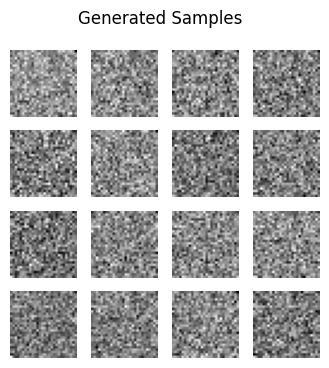

In [ ]:

# Function to display generated samples
def plot_generated_samples(samples, title='Generated Samples'):
    fig, axs = plt.subplots(4, 4, figsize=(4, 4), sharey=True, sharex=True)
    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(samples[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.suptitle(title)
    plt.show()

# Plot generated samples
plot_generated_samples(generated_samples)


--->  The below code facilitates a visual inspection of the generator and discriminator model architectures by generating graphical representations and saving them as PNG files. This visualization helps in understanding the structure of the neural network models, including the arrangement of layers and their connections.

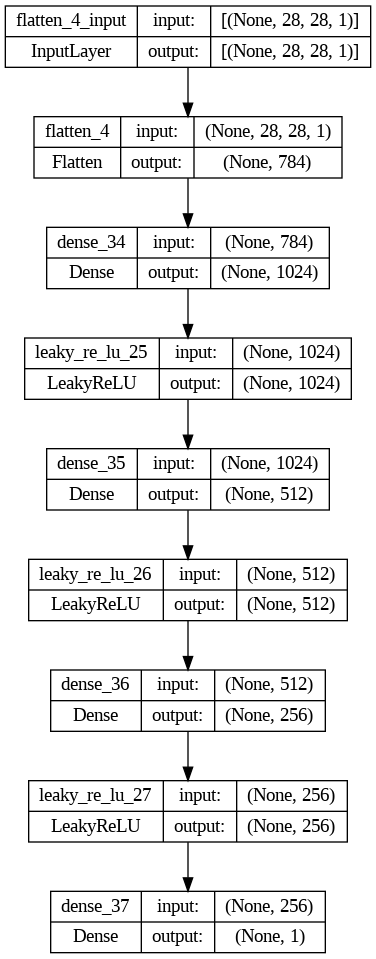

In [ ]:

# Visualize the generator model architecture
plot_model(generator_wgan_sn, to_file='generator_model.png', show_shapes=True)

# Visualize the discriminator model architecture
plot_model(discriminator_wgan_sn, to_file='discriminator_model.png', show_shapes=True)


---> It generates a single image using the trained generator model (generator_wgan_sn).
- Creates a random noise vector with a normal distribution (mean=0, standard deviation=1) to serve as input to the generator.

- The size of the noise vector is (1, 100), indicating a single instance of noise in a 100-dimensional space.

- Passes the random noise through the trained generator (generator_wgan_sn) to generate a synthetic image.

- The predict method transforms the noise into an image using the trained generator.

- The below process process of generating a single synthetic image by providing random noise to the trained generator model. The generated image is then rescaled for visualization and displayed using Matplotlib. This can be useful for inspecting the quality of individual generated samples.







1/1 [==============================] - 0s 24ms/step


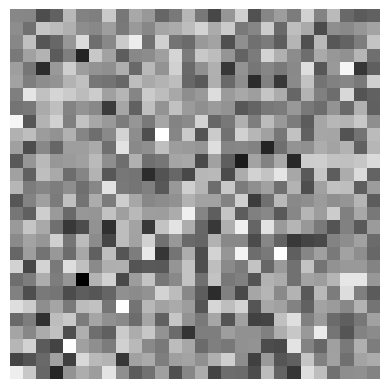

In [ ]:

# Generate random noise as input to the generator
random_input = np.random.normal(0, 1, size=(1, 100))

# Use the trained generator to generate an image
generated_image = generator_wgan_sn.predict(random_input)

# Rescale the generated image to the range [0, 1] for visualization
generated_image = 0.5 * generated_image + 0.5

# Display the generated image
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()


## Presentation of generated results, data, and tables.

---> The Project goal is to visually assess and communicate the quality and progression of synthetic samples generated by the GAN, specifically the generator model.

- Purpose:
Creates a visual representation of synthetic images generated by the GAN.
Demonstrates the progression of generated images over training epochs.
Parameters:

- epoch: The training epoch at which the images are generated.

- examples: The number of synthetic images to generate and display (default is 10).

- dim: Dimensions of the grid in which images are displayed (default is a 1x10 grid).

- figsize: Size of the figure (default is 10x1 inches).

- Process:
Random noise is generated and fed into the generator to produce synthetic images.The generated images are rescaled to the range [0, 1].The images are displayed in a grid, and the grid is saved as a PNG file with a filename indicating the training epoch.

#### Visualization during Training:
The save_generated_images function is called at specified intervals during the training loop.
For each call, it generates and displays a grid of synthetic images, allowing observation of the generator's improvement over epochs.

#### Quality Improvement:
The progressive visualizations illustrate how the quality of the generated images evolves over the course of training.
Initially, the images may appear random or noisy, but as training progresses, they become more realistic and resemble the target dataset.

#### Interpretation:
Analysts and researchers can interpret the visualizations to gauge the effectiveness of the GAN training.
A consistent improvement in image quality indicates successful learning, while stagnation or deterioration may indicate challenges or issues in the training process.

#### Output:
The generated image grids are saved as PNG files, providing a tangible record of the GAN's performance at different training stages.
These files can be used for documentation, analysis, or inclusion in presentations and reports.

---> The presentation of generated results involves the systematic creation and visualization of synthetic images at different training epochs, offering insights into the learning dynamics and performance of the GAN. The save_generated_images function encapsulates this process by producing image grids for documentation and analysis.


##References and resources used in the project.



1.   Radford, A., et al. (2015). "Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks (DCGAN)."
2.   Arjovsky, M., et al. (2017). "Wasserstein GAN."
3.   Goodfellow, I., Bengio, Y., Courville, A. (2016). "Deep Learning."
4.   Foster, D. (n.d.). Generative Deep learning. O’Reilly Online Learning. https://www.oreilly.com/library/view/generative-deep-learning/9781492041931/ch01.html
5.   Mirza, M., & Osindero, S. (2014). "Conditional Generative Adversarial Nets.
6.   Chen, X., et al. (2016). "InfoGAN: Interpretable Representation Learning by Information Maximizing Generative Adversarial Nets.
7.   Karras, T., et al. (2019). "A Style-Based Generator Architecture for Generative Adversarial Networks.
8. Papers with Code - An Overview of Generative Models. (n.d.). https://paperswithcode.com/methods/category/generative-models
9.   Zhu, J. Y., et al. (2017). "Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks.
10.   Ma, Y., et al. (2019). "EfficientGAN: High-Performance Energy-Efficient GAN Inference.







